In [373]:
%run cex_search.py
from scipy import integrate

In [ ]:
zf = make_my_interp(0.8, 0.02, 2, 2, 5, kind="slinear")
zf_ode = make_ode_force(zf)

In [ ]:
xs = np.arange(-20, 20, 0.01)
ys = [zf(x) for x in xs]
plt.plot(xs, ys)

In [ ]:
T = 30
times = np.arange(0.1, T, 0.01)
plot_sol_arb(12.51, T, zf_ode, times, rtol = 1e-8, atol = 1e-8, method="RK23")
plt.hlines(0, 0, 30)

In [ ]:
# calculates all the pairs (t, y') that appear 
# as the time & velocity of the particle reaching the bottom of the first well for the first time
# green is initial y small, and red is initial y large
all_t = []
all_v = []
initial_range = np.arange(2.01, 20, 0.1)

for b in initial_range:
    print(b)
    res = calc_event_arb(b, 30, zf_ode, (lambda t,y: y[0] - 2), n = 0, rtol=1e-5, atol=1e-5, method="RK23")
    if res == None:
        continue
    else:
        t, y = res
    all_t.append(t)
    all_v.append(y[1])
    
plt.plot(all_t, all_v)
plt.scatter(all_t[0], all_v[0], color='green')
plt.scatter(all_t[-1], all_v[-1], color='red')
plt.xlabel("time")
plt.ylabel("velocity")
plt.title("time & velocity achieved by ball hitting y = 1 for first time")

In [ ]:
sqrt(2)

In [ ]:
T = 50
def num_crossings(b, ode, tol=1e-8, **kwargs):
    def has_stopped(t, y): return y[1]
    has_stopped.terminal = True
    has_stopped.direction = 1
    sol = solve_ivp(ode, [1e-5, T], [b, 0], events = [at_0, has_stopped], rtol=tol, atol=tol, **kwargs)
    return len(sol.t_events[0])

In [ ]:
bs = np.arange(3, 20, 0.1)
ys = [num_crossings(b, zf_ode, tol=1e-8, method="RK23") for b in bs]

In [ ]:
plt.plot(bs, ys)

In [ ]:
T = 50
plot_sol_arb(10, T, zf_ode, times, rtol = 1e-8, atol = 1e-8, method="RK23")
plot_sol_arb(12, T, zf_ode, times, rtol = 1e-8, atol = 1e-8, method="RK23")

In [ ]:
xs = np.arange(0, 20, 0.01)
ys = [zf(x) for x in xs]
y_int = integrate.cumtrapz(ys, xs, initial=0)
plt.plot(xs, y_int)
plt.vlines(10, 0, 3)
plt.vlines(12, 0, 3)

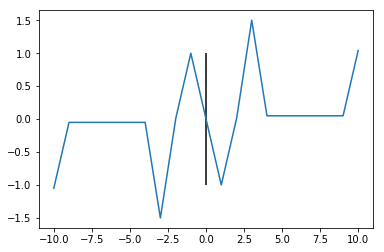

In [413]:
zf2 = make_my_interp2(1.5, 5, 0.05, 1)
zf2_ode = make_ode_force(zf2)
xs = np.arange(-10, 10, 0.01)
ys = [zf2(x) for x in xs]
plt.plot(xs, ys)
plt.vlines(0, -1, 1)
# plt.hlines(0, -10, 10)

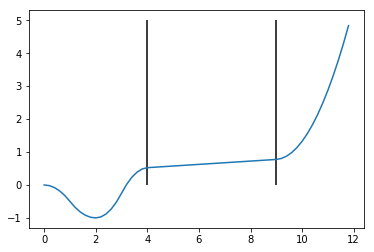

In [411]:
xs = np.arange(0, 12, 0.2)
ys = [zf2(x) for x in xs]
y_int = integrate.cumtrapz(ys, xs, initial=0)
plt.plot(xs, y_int)
plt.vlines(9, 0, 5)
plt.vlines(4, 0, 5)

In [380]:
num_crossings(9, zf2_ode, tol=1e-8, method="Radau")

1

In [381]:
num_crossings(15, zf2_ode, tol=1e-8, method="Radau")

0

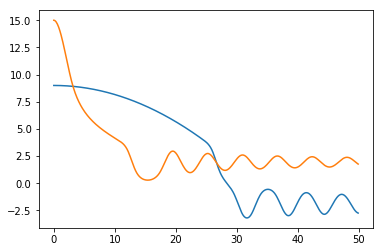

In [382]:
plot_sol_arb(9, 50, zf2_ode, method="RK23")
plot_sol_arb(15, 50, zf2_ode, method="Radau")

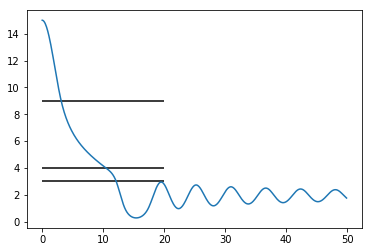

In [446]:
# plot_sol_arb(17, 50, zf2_ode, method="Radau")
plot_sol_arb(15, 50, zf2_ode, method="Radau")
# plot_sol_arb(12, 50, zf2_ode, method="Radau")
plt.hlines(9, 0, 20)
plt.hlines(4, 0, 20)
plt.hlines(3, 0, 20)

In [463]:
sol = calc_event_arb(15, 30, zf2_ode, lambda t,y: y[0] - 1, rtol=1e-8, atol=1e-8)

In [464]:
sol

(13.563945338021613, array([ 1.       , -1.0193439]))

In [439]:
sol = solve_ivp(zf2_ode, [1e-8, 40], [15, 0], events = lambda t,y: y[0] - 9, rtol=1e-10, atol=1e-10, method = "Radau")

In [440]:
sol.t_events

[array([3.11583907])]

In [441]:
zf2_ode(3.14159, [9, -0.954929658551372])

[-0.954929658551372, 0.5579276153485159]

In [ ]:
bs = np.arange(3, 13, 1)
ys = [num_crossings(b, zf2_ode, tol=1e-8, method="RK23") for b in bs]

In [ ]:
plt.plot(bs, ys)

In [ ]:
plot_sol_arb(8, 50, zf2_ode, method="RK23")

In [ ]:
num_crossings(12, zf2_ode, tol=1e-8, method="Radau")

In [ ]:
b = 8
T = 50
def has_stopped(t, y): return y[1]
has_stopped.terminal = True
has_stopped.direction = 1
sol = solve_ivp(zf2_ode, [1e-5, T], [b, 0], events = [at_0, has_stopped], rtol=1e-8, atol=1e-8, method="RK23")
sol.t_events[0]
plt.plot(sol.t, sol.y[0])

In [ ]:
plt.plot(sol.t, sol.y[0])

In [442]:
def myf(y): return 0.05
const_ode = make_ode_force(myf)

In [443]:
sol = solve_ivp(const_ode, [1e-8, 40], [9, 0], events = lambda t,y: y[0] - 4, rtol=1e-10, atol=1e-10, method = "Radau")

In [445]:
sol.t_events

[array([24.49489743])]